In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# About the dataset

**Objective**
This dataset tracks air quality across cities by recording pollutant levels and environmental factors. It helps analyze the impact of pollutants on the Air Quality Index (AQI) and supports the development of predictive models. The data aids in identifying high-risk areas, guiding pollution control strategies, and improving public health management. It also raises awareness about the health risks associated with poor air quality.


**Fetures and their discriptions**



- City: The location of data collection.
- Date: The date of observation (can be processed into meaningful features like day, month, or season).
- Pollutant Levels:
 - PM2.5 (Particulate Matter ≤ 2.5 µm): Tiny particles in the air that reduce visibility and cause serious health issues as they can penetrate deep into the lungs and bloodstream.
 - PM10 (Particulate Matter ≤ 10 µm): Larger particles than PM2.5 that can irritate the respiratory system but are less likely to penetrate deeply.
 - NO (Nitric Oxide): A colorless gas primarily produced by vehicles and industrial processes, contributing to smog and acid rain.
 - NO2 (Nitrogen Dioxide): A reddish-brown toxic gas resulting from burning fossil fuels, which contributes to respiratory problems and environmental issues like acid rain.
 - NOx (Nitrogen Oxides): A group of reactive gases, primarily NO and NO2, that play a significant role in ozone formation and air pollution.
 - NH3 (Ammonia): A colorless gas with a pungent smell, often from agricultural activities and waste, which contributes to the formation of fine particulate matter.
 - CO (Carbon Monoxide): A colorless, odorless gas from incomplete combustion of fuels, harmful to humans as it reduces oxygen delivery to organs.
 - SO2 (Sulfur Dioxide): A pungent gas produced by burning fossil fuels and industrial processes, which can cause respiratory problems and acid rain.
 - O3 (Ozone): A reactive gas formed from other pollutants in the presence of sunlight, harmful at ground level but protective in the upper atmosphere.
 - Benzene: A volatile organic compound (VOC) that is carcinogenic, primarily emitted from vehicles and industrial processes.
 - Toluene: Another VOC used in industrial applications and solvents, with potential health impacts like dizziness and long-term nervous system effects.
 - Xylene: A VOC found in petroleum products and industrial emissions, with short-term effects like headaches and long-term nervous system damage.







**The target variable:-**

 **(AQI)**is the Air Quality Index= a numerical value that represents air quality based on pollutant concentrations. The goal is to predict AQI using features like PM2.5, NO2, CO, and others.

**Problem statement:-**
Develop a predictive model to determine air quality, This aims to support proactive measures for environmental and public health management.

# Understanding the data

In [ ]:
df=pd.read_csv("/content/city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Data cleaning

## Feature engineering

In [ ]:

# Convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year
df['Year'] = df['Date'].dt.year

# Extract the month
df['Month'] = df['Date'].dt.month

# Extract the day of the week (0 = Monday, 6 = Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# droping previous column
df.drop("Date", axis=1, inplace=True)

In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Year,Month,DayOfWeek
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1,3
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,1,4
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,1,5
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,1,6
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020,6,5
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020,6,6
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020,6,0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020,6,1


In [ ]:
null=df.isnull().sum()
print(null[null>0])

PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [ ]:
# droping Xylene column because its have high amount of null values
df.drop("Xylene",axis=1,inplace=True)

# droping aqi bucket its target variable for classification
df.drop("AQI_Bucket",axis=1,inplace=True)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'AQI'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'DayOfWeek'}>, <Axes: >]], dtype=object)

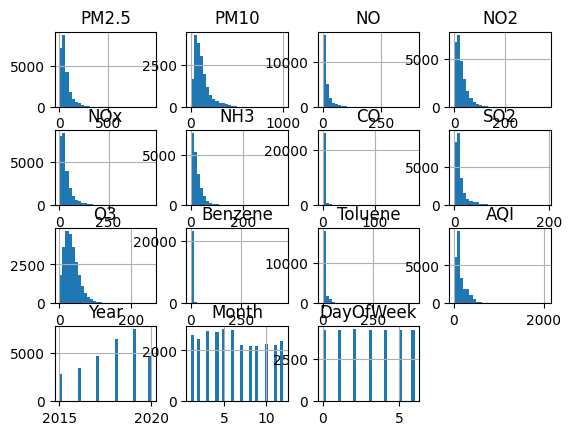

In [ ]:
df.hist(bins=30)

In [ ]:

# filling all with median because  fetures  have skewness
df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)


df["AQI"].fillna(df["AQI"].median(),inplace=True)



<ipython-input-106-7f4ea76c1a77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-106-7f4ea76c1a77>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

# Descripitve statistics

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,DayOfWeek
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,64.510857,109.659366,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,158.781552,2017.887914,6.267143,2.998747
std,59.807551,72.324020,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,130.272413,1.533783,3.431974,2.000110
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000,2015.000000,1.000000,0.000000
25%,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,88.000000,2017.000000,3.000000,1.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,118.000000,2018.000000,6.000000,3.000000
75%,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,179.000000,2019.000000,9.000000,5.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000,2020.000000,12.000000,6.000000


In [ ]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,DayOfWeek
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,1,3
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,1,4
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,1,5
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,1,6
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,2020,6,5
29527,Visakhapatnam,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,2020,6,6
29528,Visakhapatnam,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,2020,6,0
29529,Visakhapatnam,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,2020,6,1


# Data visualization

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'AQI'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'DayOfWeek'}>, <Axes: >]], dtype=object)

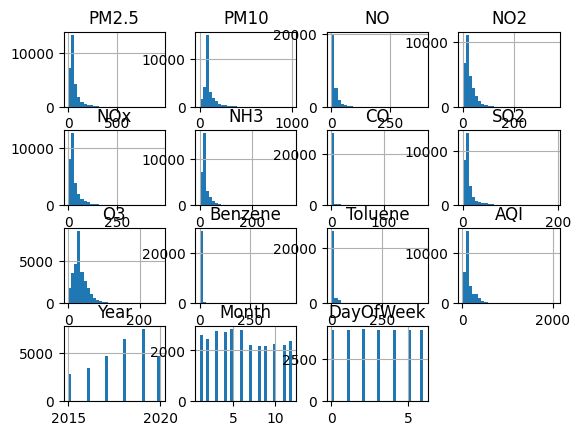

In [ ]:
df.hist(bins=30)

# Correlation Analysis

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["City"]=le.fit_transform(df["City"])

<Axes: >

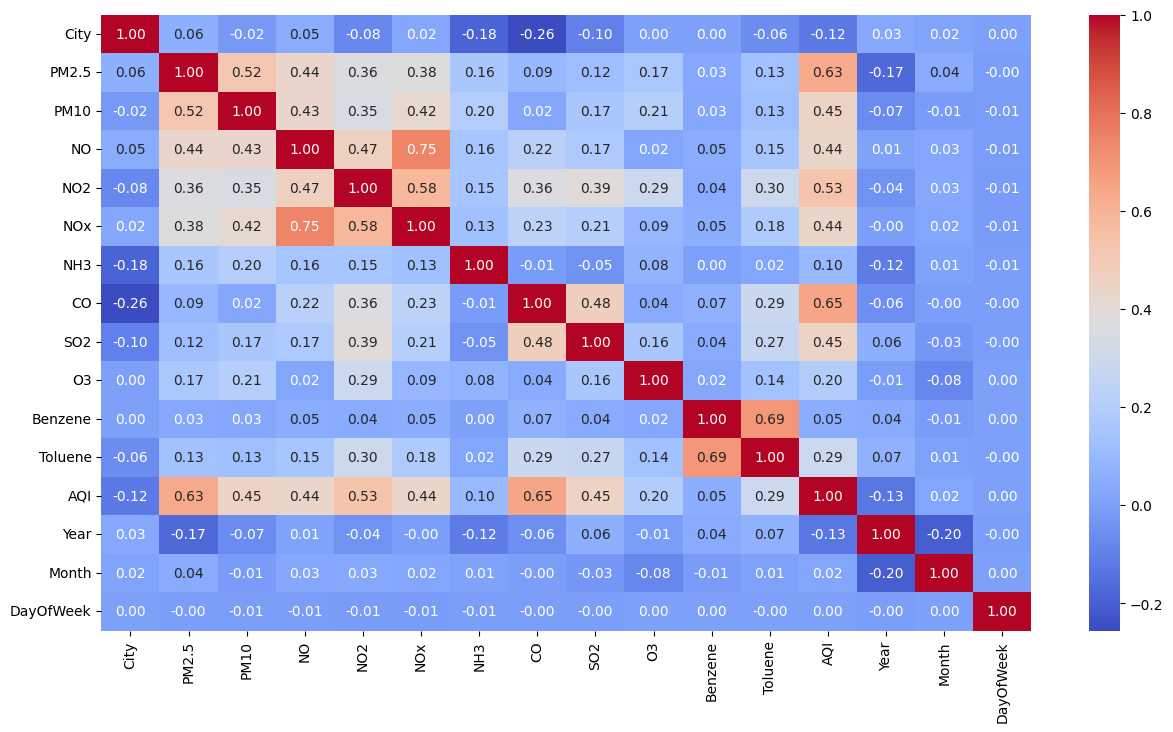

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="coolwarm")

In [ ]:
# droping NOx feature because its and NO fetaure have same correlation
df.drop("NO",axis=1,inplace=True)

# And also droping no2 and NOx have same correlation
df.drop("NO2",axis=1,inplace=True)


In [ ]:
df

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,DayOfWeek
0,0,48.57,95.68,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,1,3
1,0,48.57,95.68,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,1,4
2,0,48.57,95.68,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,1,5
3,0,48.57,95.68,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,1,6
4,0,48.57,95.68,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,25,15.02,50.94,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0,2020,6,5
29527,25,24.38,74.09,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0,2020,6,6
29528,25,22.91,65.73,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0,2020,6,0
29529,25,16.64,49.97,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0,2020,6,1


<Axes: >

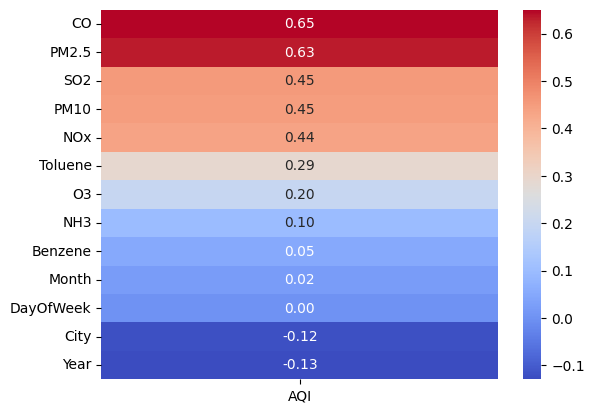

In [ ]:
target=df.corr()["AQI"].sort_values(ascending=False)
target=target.drop("AQI")

sns.heatmap(target.to_frame(),annot=True,fmt=".2f",cbar=True,cmap="coolwarm")

**Taking only 0.4 or greater than only**

In [ ]:
# droping less correlated fetaures
df.drop("Benzene",axis=1,inplace=True)
df.drop("Month",axis=1,inplace=True)
df.drop("DayOfWeek",axis=1,inplace=True)
# df.drop("City",axis=1,inplace=True)
# df.drop("O3",axis=1,inplace=True)
# df.drop("NH3",axis=1,inplace=True)
# df.drop("Year",axis=1,inplace=True)
# df.drop("Toluene",axis=1,inplace=True)

In [ ]:
df

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3,Toluene,AQI,Year,pca1,pca2
2016,0.693147,3.489208,3.749739,1.830980,3.195402,0.385262,1.798404,2.278292,0.783902,51.0,7.611348,-4.012270,0.625645
2017,0.693147,3.802208,3.999851,1.786747,3.194993,0.392042,1.840550,2.394252,0.746688,63.0,7.611348,-3.310683,0.252164
2026,0.693147,3.957570,4.111366,1.587192,3.430433,0.364643,2.162173,2.278292,0.506818,71.0,7.611348,-2.973093,-0.042576
2122,1.098612,4.281654,4.760035,2.595255,2.579459,0.095310,2.464704,4.702841,1.934416,118.0,7.609862,0.101878,-0.451333
2127,1.098612,4.296877,4.752210,2.867331,2.583998,0.148420,2.446685,4.707185,1.742219,173.0,7.609862,0.255408,-0.472097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,3.258097,2.773838,3.950089,3.022374,2.600465,0.385262,2.256541,3.190476,2.570320,41.0,7.611348,-1.830270,2.600709
29527,3.258097,3.233961,4.318687,2.863914,2.564180,0.418710,2.618855,3.438493,1.166271,70.0,7.611348,-1.098949,1.513519
29528,3.258097,3.174297,4.200655,2.961658,2.460443,0.392042,2.242835,3.464485,0.009950,68.0,7.611348,-1.955143,0.825548
29529,3.258097,2.870169,3.931237,2.985682,2.400619,0.418710,2.383243,3.377588,0.000000,54.0,7.611348,-2.585473,1.340889


array([[<Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Toluene'}>],
       [<Axes: title={'center': 'AQI'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

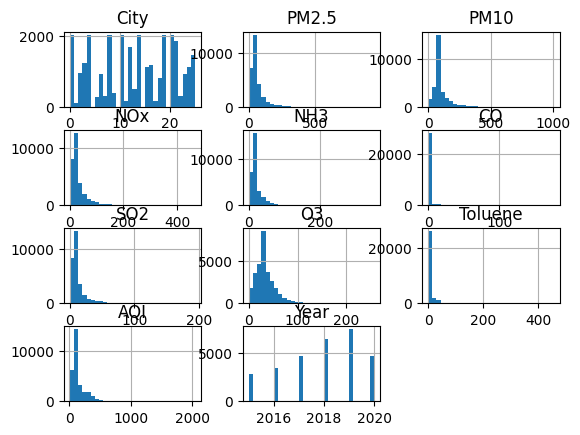

In [ ]:
df.hist(bins=30)

### skewnes handling

In [ ]:
import numpy as np

df["PM2.5"]=np.log1p(df["PM2.5"])
df["PM10"]=np.log1p(df["PM10"])
df["NOx"]=np.log1p(df["NOx"])
df["CO"]=np.log1p(df["CO"])
df["SO2"]=np.log1p(df["SO2"])
df["Toluene"]=np.log1p(df["Toluene"])
df["O3"]=np.log1p(df["O3"])
df["NH3"]=np.log1p(df["NH3"])
df["City"]=np.log1p(df["City"])
df["Year"]=np.log1p(df["Year"])



array([[<Axes: title={'center': 'City'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Toluene'}>],
       [<Axes: title={'center': 'AQI'}>,
        <Axes: title={'center': 'Year'}>, <Axes: >]], dtype=object)

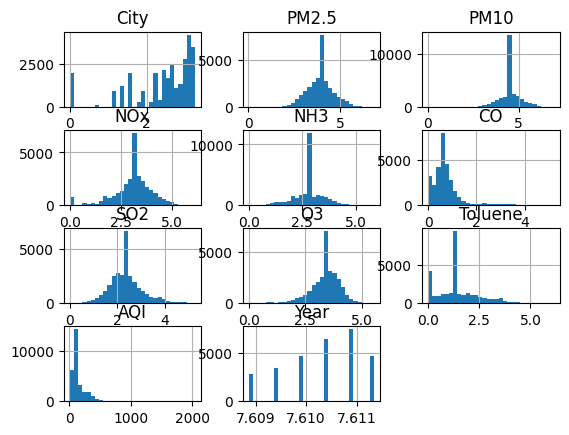

In [ ]:
df.hist(bins=30)

# Outlier checking and removing

<Axes: >

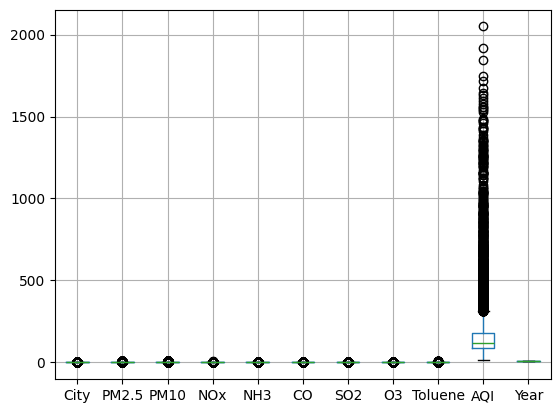

In [ ]:
df.boxplot()

In [ ]:
# Function to remove outliers using the IQR method except for one column
def remove_outliers_iqr(df, exclude_column):
    for col in df.columns:
        # Skip the specified column
        if col == exclude_column:
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter the DataFrame to remove rows with outliers in each column
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the column to exclude
df_cleaned = remove_outliers_iqr(df, exclude_column='AQI')
df=df_cleaned

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


x=df[["PM2.5","PM10","NOx","CO","SO2","Toluene","O3","NH3","City","Year"]]
y=df["AQI"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)


mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"MSE: {mse}, r2: {r2}")

MSE: 1372.6708602632816, r2: 0.6982252923057198


In [ ]:
df

,City,PM2.5,PM10,NOx,NH3,CO,SO2,O3,Toluene,AQI,Year
2016,0.693147,3.489208,3.749739,1.830980,3.195402,0.385262,1.798404,2.278292,0.783902,51.0,7.611348
2017,0.693147,3.802208,3.999851,1.786747,3.194993,0.392042,1.840550,2.394252,0.746688,63.0,7.611348
2026,0.693147,3.957570,4.111366,1.587192,3.430433,0.364643,2.162173,2.278292,0.506818,71.0,7.611348
2122,1.098612,4.281654,4.760035,2.595255,2.579459,0.095310,2.464704,4.702841,1.934416,118.0,7.609862
2127,1.098612,4.296877,4.752210,2.867331,2.583998,0.148420,2.446685,4.707185,1.742219,173.0,7.609862
...,...,...,...,...,...,...,...,...,...,...,...
29526,3.258097,2.773838,3.950089,3.022374,2.600465,0.385262,2.256541,3.190476,2.570320,41.0,7.611348
29527,3.258097,3.233961,4.318687,2.863914,2.564180,0.418710,2.618855,3.438493,1.166271,70.0,7.611348
29528,3.258097,3.174297,4.200655,2.961658,2.460443,0.392042,2.242835,3.464485,0.009950,68.0,7.611348
29529,3.258097,2.870169,3.931237,2.985682,2.400619,0.418710,2.383243,3.377588,0.000000,54.0,7.611348


In [ ]:
df2=df

## data scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features=["PM2.5","PM10","NOx","CO","SO2","Toluene","O3","NH3","City","Year"]

scaler = MinMaxScaler()


scaled_data = scaler.fit_transform(df[features])
df1 = pd.DataFrame(scaled_data, columns=features, index=df.index)

In [ ]:
# Define features and target variable
X = df1[["PM2.5","PM10","NOx","CO","SO2","Toluene","O3","NH3","City","Year"]]
y=df["AQI"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)


mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"MSE: {mse}, r2: {r2}")

MSE: 1372.6708602632816, r2: 0.6982252923057198


## PCA Diamonsinality reduction

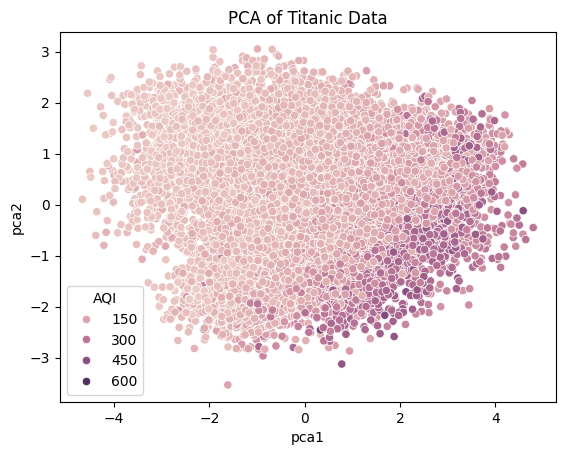

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = ["PM2.5","PM10","NOx","CO","SO2","Toluene","O3","NH3","City","Year"]
X = StandardScaler().fit_transform(df[features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Add PCA results to the DataFrame
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Visualize PCA results
sns.scatterplot(x='pca1', y='pca2', hue='AQI', data=df)
plt.title('PCA of Titanic Data')
plt.show()

In [ ]:
x=df[["pca1","pca2"]]
y=df["AQI"]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)


mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print(f"MSE: {mse}, r2: {r2}")

MSE: 2248.405763390484, r2: 0.5056994275414588


In [ ]:
# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

In [ ]:
X = df1[["PM2.5","PM10","NOx","CO","SO2","Toluene","O3","NH3","City","Year"]]
y=df["AQI"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the dataset (only for some algorithms like SVR and Neural network-which gives better results )
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [ ]:
# Dictionary to store the results
results = {}

In [ ]:
# Apply each model and compute metrics
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
  else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2} # name represents the "key" of the dictionary. Here key is the name of the algorithms
  # In the new dictionary "results", the key is the name of the algorithm; and the "key" is the MAE, RMSE,and R2 values
  # results[name] will be the different key when the name of the algorithm changes

In [ ]:
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)

                                MAE       RMSE        R²
Linear Regression         27.262019  37.049573  0.698225
Ridge Regression          27.253696  37.054735  0.698141
Lasso Regression          27.490570  38.138046  0.680233
ElasticNet Regression     43.624472  63.418070  0.115816
Decision Tree             20.919925  36.969110  0.699535
Random Forest             14.631946  25.551698  0.856466
Gradient Boosting         15.452632  25.158848  0.860845
Support Vector Regressor  20.164111  34.631734  0.736327
K-Nearest Neighbors       16.621672  28.126829  0.826077
Neural Network            15.274788  25.078798  0.861729
